## Microsoft Movie Pitch Submission

* Student name: **Ashleigh Stephens**
* Student pace: FLEX 60 Wk
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: N/A

# I. Business Understanding
### Business Objectives:
To get Microsoft in on all the creating original video content fun the other big companies are having, we're exploring what types of films have performed the best at the box office.
<br><br>
To give greater insight into creating movies, we're translating findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create in a new movie studio.
<br><br>
### Assess Situation: 
Our resources contained in the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Using our resources we will yield three concrete business recommendations based on data analysis while providing visualizations to support our suggestions with the following project requirements:

* A jupyter notebook with your technical analysis
* A 5-10 minute non-technical executive summary presentation
* A GitHub repository that contains:
  * the .ipynb notebook file
  * the .pdf of your presentation
  * a README summarizing your results

### Data Mining Goals:
Determining what type of films to create is crucial, but this arise from exploring the data in different ways. The goal is the answer the following questions and determine the best fit of movies for Microsoft to create:
    * Who are the top competition?
    * What are the top return on investment movies?
    * How much does it cost to make a movie?
    * Profit
    * What do people like?
### Project Plan:
The selected technologies and tools is to follow:

In [1]:
# **Importing Packages & Tools for Data**
 
# Packages to preform data analysis of files
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import seaborn as sns  # Alias seaborn to be referred to as sns
import sqlite3 # Importing SQL
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt

# For linear regression fitting
# MOST LIKELY CAN DELETE EXCEPT FOR MAYBE THE FIRST LINE
from matplotlib import style
from statistics import mean
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Code to show all outputs in the cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   

# To increase efficency for processing
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # For pandas 
import sys
sys.setrecursionlimit(1500)

# Built-in Magic Commands to Utilize:
#%matplotlib inline # renders plots in the notebook itself
#%pwd # print the current working directory
#%cd # change working directory
#%ls # show contents in the current directory
#%load [insert Python filename here] # load code into the Jupyter notebook
#%store [insert variable here] # this lets you pass variables between Jupyter Notebooks
#%who # use this to list all variables

In [2]:
# load the following to run CPI analysis
from datetime import date
# Importing CPI to do inflation adjustments
# only for python version 3 or higher
import cpi  

Now that we have all the packages and necessary additions, we need to make sure we are working with accurate inflation rates when using CPI's data. This update can be timely, so best to only run at the start of the notebook and then '#" it out when manipulating the notebook. 

In [3]:
# run the following to get the latest CPI data
# mostly skip due to time it takes to load
# cpi.update()

#### Data Analysis Formulas

Due to several calculations applying to multiple dataframes (df), we will utilize the following functions as tools to interrupt the data:
1. **Spread**: This function returns the df' 'Shape' with 'Null Sum' and 'Null Percentage' per column within df.
2. **dup**: Shows a df's length and width, sum of duplicate rows within data, with the sum and percentage of duplicate data within each column of the df.
3. **dup_list**: Shows you the duplicate entries within a column of the df.
4. **dupSnap**: Returns the shape, sum of duplicated values with a boolen as well. 

**Spread**:<br>
Shows the 'Shape' within the df with 'Null Sum' and 'Null Percentage' per column within df.

The function allows us to see brief insight into the data, allowing us to make adequate assumptions before proceeding. Using `df.shape` we can see the size and shape before merging data, making sure data isn't lost. Null Sum Per Column allows us to see what columns exist, and the null data within each, utilizing `df.isna().sum()`. By dividing the missing data sum by length, we are given the Null Percentage within Columns; significant missing data will be replaced or culled on a case by case bases. 

In [4]:
# Formula to shorten time and show
# the 'Shape', 'Null Sum' and 'Null Percentage' 
def spread(df):
    PercentNull = (df.apply(lambda x: x.isna().sum()
                   / len(df))) * 100 
    
    return print(f'***Shape:***', df.shape,
                 f'***Null Sum Per Column:***', df.isna().sum(),
                 f'***Null Percentage within Columns:***',
                 (round(PercentNull, 2)))

**dup**:<br>
Shows a df's length and width, sum of duplicate rows within data, with the sum and percentage of duplicate data within each column of the df.

In [5]:
# OG
def dup(df):
    dups = df.duplicated(keep=False)
    SumDups = dups.values.sum()
    SumDupsnCol = (df.apply(
        lambda x: x.duplicated(keep=False).values.sum())
                  )
    PercentDups = (df.apply(
        lambda x: x.duplicated(keep=False).values.sum()/ len(df))
                  ) * 100 
    
    return print(f'***Shape:***', df.shape,
                 f'***Duplicate Sum:***', SumDups,
                 f'***Duplicate Sum Per Column:***',
                 (round(SumDupsnCol, 2)),
                 f'***Duplicate Percentage within Columns:***',
                 (round(PercentDups, 2)))

In [6]:
# # FUCKING FIX THIS!

# def dup(df):
#     dups = df.duplicated(keep=False)
#     SumDups = dups.values.sum()
#     SumDupsnCol = (df.apply(lambda x: x.dups.values.sum()) #added dups 
#                   )
#     PercentDups = (SumDupsnCol / len(df)  #added SumDupsnCol
#                   ) * 100 
    
#     return print(f'***Shape:***', df.shape,
#                  f'***Duplicate Sum:***', SumDups,
#                  f'***Duplicate Sum Per Column:***',
#                  (round(SumDupsnCol, 2)),
#                  f'***Duplicate Percentage within Columns:***',
#                  (round(PercentDups, 2)))

**dup_list**:<br>
Shows you the duplicate entries within a column of the df.

In [7]:
# To see the amount of data duplicated wtihin column
def dup_list(column,df):
    duplicates = df[df.duplicated(keep=False)]
    return duplicates.sort_values([column])

**dupSnap**:<br>
Returns the shape, sum of duplicated values with a boolen as well.

In [8]:
# To check and see the amount of data duplicated within df
def dupSnap(df):
        dup = df.duplicated(keep=False)
        sumOfDups = dup.values.sum()
        boolenOfDups = dup.value_counts()
        return print(f'***Shape:***', df.shape,
                 f'***Duplicate Sum:***', sumOfDups,
                 f'***Dup Boolen:***', boolenOfDups)

Additionally, here is my code for my custom color palette for my graphs.

In [367]:
# Creating palettes for graphs with colors I want
color = ['#a1cac9', '#6667ab', '#8c5896', '#b3832f', '#cfbf54',
         '#759f51', '#48996b', '#9d848e', '#884c5e', '#86a293',
         '#6667ab', '#ccb97e', '#d29381', '#e3c1c0', '#c4aeb1']
mine = sns.color_palette(color, 15)

# II. Data Understanding
### Collecting Initial Data:
Acquire the necessary data and (if necessary) load it into your analysis tool.
<br><br>
The data we will work with is saved in the folder `zippedData` and we will import them. Fortunately, Pandas supports zip files, so we won't need combine and open the data. 

In [9]:
# ***loading zip files***

# tmdb.movies.csv.gz
Mrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/tmdb.movies.csv.gz")
# rt.movie_info.tsv.gz
RTMIrawdf = pd.read_table("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/rt.movie_info.tsv.gz")
# tn.movie_budgets.csv.gz
MBrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/tn.movie_budgets.csv.gz")
# imdb.title.basics.csv.gz
TBrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.basics.csv.gz")
# imdb.title.ratings.csv.gz
TRrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.ratings.csv.gz")

# Maybes
# bom.movie_gross.csv.gz
MGrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/bom.movie_gross.csv.gz")

# Maybe Maybes
# imdb.title.crew.csv.gz
TCrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.crew.csv.gz")
# imdb.title.principals.csv.gz
TPrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.principals.csv.gz")


### Describing data:
Quickly examining the data with its surface properties. For each df we look at the number of records, sum of duplicated data, column names, non-null count, data type and data format.
Doing this quick glance at the data will provide a snapshot into the issues may lay ahead.

In [10]:
print(f'Movie Gross:', dupSnap(MGrawdf), MGrawdf.info())
print(f'Movie Info:',dupSnap(RTMIrawdf), RTMIrawdf.info())
print(f'Movie Budgets:', dupSnap(MBrawdf), MBrawdf.info())
print(f'Title Basics:', dupSnap(TBrawdf), TBrawdf.info())
print(f'Movies:', dupSnap(Mrawdf), Mrawdf.info())
print(f'Title Crew:', dupSnap(TCrawdf), TCrawdf.info())
print(f'Title Principles:', dupSnap(TPrawdf), TPrawdf.info())
print(f'Title Ratings', dupSnap(TRrawdf), TRrawdf.info())

***Shape:*** (3387, 5) ***Duplicate Sum:*** 0 ***Dup Boolen:*** False    3387
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
Movie Gross: None None
***Shape:*** (1560, 12) ***Duplicate Sum:*** 0 ***Dup Boolen:*** False    1560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null  

Quick glance at potential pit falls:<br>

**Movie Gross**:<br>
Small size (3387, 5), only containing null values in three column s although potentially only one with significant amounts missing, and no duplicates at first glance. <br>

**Movie Info**:<br>
Smallest size (1560, 12) but with 12 columns, 11 columns containing null values although significant amount potentially found in three columns, and no duplicates at first glance. <br>

**Movie Budgets**:<br>
Medium sized (5782, 6), no null values, and no duplicates at first glance.<br>

**Title Basics**:<br>
Larger size (146144, 6), only containing null values in one column although a potentially significant amount, and no duplicates at first glance. <br>

**Movies**:<br>
Medium sized (26517, 10) but with 10 columns, no null values, and no duplicates at first glance.<br>

**Title Crew**:<br>
Larger size (146144, 3), only containing null values in two column although a potentially significant amount in only one column, and no duplicates at first glance. Interestingly, contains same amount of entries as `Title Basics`, but has only three columns vs six as seen above.<br>

**Title Principles**:<br>
Largest data set (1028186, 6), only containing null values in two columns, and no duplicates at first glance. <br>

**Title Ratings**:<br>
Medium sized (73856, 3), no null values, and no duplicates at first glance. <br>

Analyses for duplicate data will need to be explored again later on once the data is more clean. 

### Explore data: 
Lets dig deeper into the data. Query it, visualize it, and identify relationships among the data.

In [11]:
print(f'Movie Gross:')
MGrawdf.head()
print(f'Movie Info:')
RTMIrawdf.head()
print(f'Movie Budgets:')
MBrawdf.head()
print(f'Title Basics:')
TBrawdf.head()
print(f'Movies:')
Mrawdf.head()
print(f'Title Crew:')
TCrawdf.head()
print(f'Title Principles:')
TPrawdf.head()
print(f'Title Ratings')
TRrawdf.head()

Movie Gross:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Movie Info:


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Movie Budgets:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Title Basics:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Movies:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Title Crew:


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


Title Principles:


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Title Ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# INSERT graph/pic from proposal with visual links

***Verify data quality***: How clean/dirty is the data? Document any quality issues.
<br><br>

# III. Data Preparation
### Selecting data: 
The following data sets are being utilized, for specific columns, for distinctive purposes:
* **Movie Gross**
    * Title
    * Studio
    * Domestic Gross
    * Year
        * Determine Top Competitors
* **Movie Budget**
    * Movie
    * Date
    * Production Budget
    * Domestic Budget
    * Worldwide Budget
        * Determine Top Return on Investment
* <b>Title Basics</b>
    * Primary Title
    * Genre
    * Year
    * Runtime_Minutes
        * Determine Top Genres
            * Average Budget per Genre
        * Determine Ideal Runtime
        * Determine Ideal Release Date
* <b>Title Ratings</b>
    * TConst
    * Average Rating
    * Num Votes
        * Determine Top Rated

# Needs To Be Placed
### Construct data: 
Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
<br><br>
### Integrate data: 
Create new data sets by combining data from multiple sources.
<br><br>
### Format data: 
Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.
<br><br>


### Cleaning data:
#### Movie Gross 
We are looking to get the data ready to determine Microsoft's Top Competitors.

In [12]:
# Movie Gross = MGrawdf = bom.movie_gross.csv.gz
# Look at Movie Gross 
MGrawdf.head()
spread(MGrawdf)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


***Shape:*** (3387, 5) ***Null Sum Per Column:*** title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 ***Null Percentage within Columns:*** title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64


Within Movie Gross, columns stuido and domestic_gross are under 1%, so removing the missing values are the best to clean the data and keep the remaining column data; `df.dropna(subset=['column'])`.

Unfortunately, `foreign_gross` has nearly 40% of missing values. Due to uncertainy we are unsure if the data is missing, or if the film never opened in foreign markets, and therefore remove the entire column. If we could pull the data from another table or website, then we may be able to assign $0 value to those movies that never made it to foreign markets and assign true missing and null values respectfully. Alas, we will delete the column due to data availability using `df.drop`.

In [13]:
# cull 'foreign_gross' and remove null values 
# from dataframe, saving as new df
MGdf = MGrawdf.dropna(subset=['studio', 'domestic_gross']
                     ).drop('foreign_gross', 1)

# check null values were dropped
spread(MGdf) 

# look at data types as well
MGdf.info()

***Shape:*** (3356, 4) ***Null Sum Per Column:*** title             0
studio            0
domestic_gross    0
year              0
dtype: int64 ***Null Percentage within Columns:*** title             0.0
studio            0.0
domestic_gross    0.0
year              0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [14]:
# Rename title and runtime columns
MGdf.rename({'title': 'movie'},
                    axis='columns', inplace = True)

In [15]:
# Check changes
MGdf.head()

,movie,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [16]:
# To check and see the amount, 
# if any values of the data are duplicated
dup(MGdf)
MGdf.duplicated().sum()
MGdf.duplicated().values.any()

***Shape:*** (3356, 4) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** movie                2
studio            3251
domestic_gross    2280
year              3356
dtype: int64 ***Duplicate Percentage within Columns:*** movie               0.06
studio             96.87
domestic_gross     67.94
year              100.00
dtype: float64


0

False

There are no duplicates within the data, but before we go any further, we need to address inflation within the columns addressing monetary values. Inflation is the general rise in the price level of an economy over a period of time. Consumer price index (`CPI`) is most commonly used to measure inflation with the inflation rate, which is the annualized percentage change in a general price index. The data contains values that are not adjusted for inflations; know as `current dollars`. What we need is the monetary values after adjusting for inflation; know as `real dollars`.
The general formula used for adjusting the prices for inflation using the CPI is:
real_dollars = (current_dollars * cpi_new) / cpi_old

In [18]:
# change current dollars to real dollars, save as new columns
# for "domestic_gross"
MGdf["domestic_gross"] = MGdf.apply(lambda x: cpi.inflate(
    x["domestic_gross"], x["year"]), axis=1)

# see if it worked!
MGdf.head()
MGdf.info()

,movie,studio,domestic_gross,year
0,Toy Story 3,BV,5.157049e+08,2010
1,Alice in Wonderland (2010),BV,4.152978e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,3.678281e+08,2010
3,Inception,WB,3.636030e+08,2010
4,Shrek Forever After,P/DW,2.966235e+08,2010


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [19]:
# Lets see what years the data covers
MGdf.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [20]:
# Lets see what years the data covers
MGdf.studio.sort_values().unique()

array(['3D', 'A23', 'A24', 'ADC', 'AF', 'AGF', 'ALP', 'AM', 'AR', 'ATO',
       'AZ', 'AaF', 'Abk.', 'Abr.', 'Affirm', 'Alc', 'Amazon', 'Ampl.',
       'Anch.', 'Annapurna', 'App.', 'ArcEnt', 'Argo.', 'Arrow', 'Arth.',
       'Asp.', 'Aviron', 'B360', 'BBC', 'BG', 'BGP', 'BH Tilt', 'BM&DH',
       'BSC', 'BSM', 'BST', 'BV', 'BWP', 'Blue Fox', 'CARUSEL', 'CAVU',
       'CBS', 'CE', 'CF&SR', 'CFI', 'CFilms', 'CGld', 'CJ', 'CL', 'CLF',
       'CLS', 'CP', 'CZ', 'Cdgm.', 'CineGalaxy', 'Cleopatra', 'Cohen',
       'Conglomerate', 'Crimson', 'Crnth', 'DF', 'DLA', 'DR', 'Da.',
       'Darin Southa', 'Distrib.', 'Dreamwest', 'Drft.', 'E1', 'EC', 'EF',
       'ELS', 'ENTMP', 'EOne', 'EXCL', 'Electric', 'Elev.', 'EpicPics',
       'Eros', 'FCW', 'FD', 'FEF', 'FIP', 'FInd.', 'FM', 'FOAK', 'FOR',
       'FR', 'FRun', 'FUN', 'Fathom', 'First', 'Focus', 'Fox', 'FoxS',
       'Free', 'GK', 'Gaatri', 'Gathr', 'Gaum.', 'Ghop', 'Global Road',
       'Gold.', 'Good Deed', 'Grav.', 'Greenwich', 'Grindston

There are way too many unique abbreviations and wrong listings for studios to accurately draw a conclusion. Hollywood's "Big 5" film studios include the following:
   * Universal Studios (owned by Comcast)
        * NBC
        * Focus Features
   * Warner Bros. Entertainment
       * Warner Bros. Pictures
       * New Line Cinema
       * Warner Animation Group
       * Castle Rock Entertainment
       * DC Studios
   * The Walt Disney Studios
       * Buena Vista
       * Walt Disney Pictures 
       * Walt Disney Animation Studios
       * Pixar
       * Marvel Studios
       * Lucasfilm
       * 20th Century Studios
       * 20th Century Animation
       * Searchlight Pictures)
   * Sony Pictures Motion Picture Group
       * Columbia Pictures
       * Screen Gems
       * TriStar Pictures
       * 3000 Pictures
       * Sony Pictures Animation
       * Stage 6 Films
       * AFFIRM Films
       * Sony Pictures International Productions
       * Sony Pictures Classics
   * Paramount Motion Pictures Group
       * CBS
       * BET
       * Comedy Central
       * Paramount+
       * Pluto TV
       * MTV
       * Paramount Pictures
       * Showtime Netwo
       * Smithsonian Channel
       * Nickelodeon

By restricting the df to contain domestic_gross higher than the medium, an attempt to accurately display the studios will be made.

In [21]:
# Lets get a good look at the stats
MGdf.domestic_gross.describe()

count    3.356000e+03
mean     3.318315e+07
std      7.675647e+07
min      1.163176e+02
25%      1.366722e+05
50%      1.590582e+06
75%      3.252603e+07
max      1.070884e+09
Name: domestic_gross, dtype: float64

In [22]:
# Make new dataframe grouped by Gross in descending order
# indexed to only include the first 1000 values
MGSdf = MGdf.sort_values(
    by=['domestic_gross'], ascending=False)[:1000]

MGSdf.studio.sort_values().unique()

array(['A24', 'Annapurna', 'Aviron', 'BG', 'BST', 'BV', 'CBS', 'EC',
       'ENTMP', 'FD', 'Focus', 'Fox', 'FoxS', 'Free', 'GrtIndia', 'IFC',
       'LG/S', 'LGF', 'MGM', 'Mira.', 'Neon', 'ORF', 'Over.', 'P/DW',
       'PFR', 'PNT', 'Par.', 'RAtt.', 'Rela.', 'SGem', 'SPC', 'STX',
       'Sony', 'Studio 8', 'Sum.', 'TriS', 'Uni.', 'W/Dim.', 'WB',
       'WB (NL)', 'Wein.'], dtype=object)

I choose the top 1000 movies, because the top 100 didn't yield a wide enough range of studios. 

In [23]:
# Lets replace and condense studios
MGSdf = MGSdf.replace(
    ('Focus', 'Uni.'), 'Universal').replace(
    ('WB', 'WB (NL)'), 'Warner Bros').replace(
    ('BV', 'Fox', 'FoxS', 'LG/S', 'LGF', 'Sum.'), 'Disney').replace(
    ('SGem', 'SPC', 'Sony', 'TriS'), 'Sony').replace(
    ('CBS', 'BG', 'Mira.', 'P/DW', 'Par.'), 'Paramount').replace(
    ('A24', 'Annapurna', 'Aviron', 'BST', 'EC', 'ENTMP', 'FD',
     'Free', 'Global Road', 'MGM', 'Neon', 'ORF', 'Over.', 'PFR', 'STX',
     'Studio 8', 'W/Dim.', 'Wein.'), 'Independent').replace(
    ('GrtIndia', 'ORF', 'RAtt.'), 'Foreign')

MGSdf.head()

,movie,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,Disney,1.070884e+09,2015
3080,Black Panther,Disney,7.554791e+08,2018
1873,Jurassic World,Universal,7.457428e+08,2015
727,Marvel's The Avengers,Disney,7.357453e+08,2012
3079,Avengers: Infinity War,Disney,7.324943e+08,2018


In [24]:
# group by to pull out each studio
studios_grp = MGSdf.groupby(['studio'])
mean_gross = studios_grp['domestic_gross'].mean()
mean_gross.sort_values(ascending=False, inplace=True)

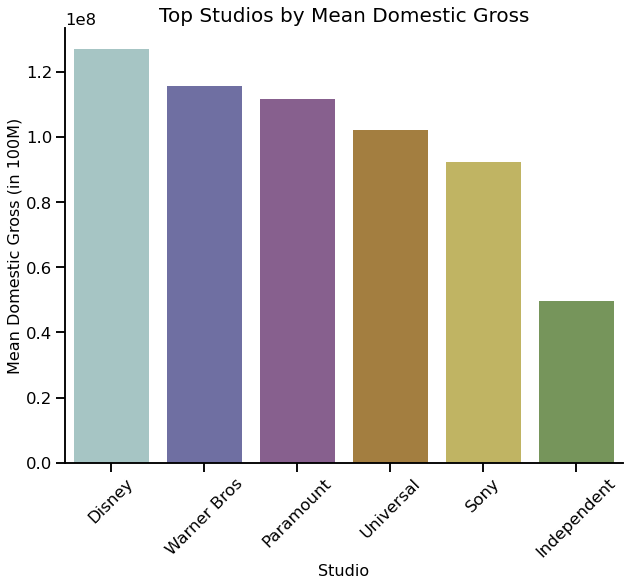

In [370]:
# create plot 
mean_gross = mean_gross[:6,]
plt.figure(figsize=(10,8))
sns.axes_style('white')
sns.set_context('talk')
sns.barplot(mean_gross.index,
            mean_gross.values,
           palette=mine)
# Customize the axes and title
plt.title('Top Studios by Mean Domestic Gross', fontsize=20)
plt.ylabel('Mean Domestic Gross (in 100M)', fontsize=16)
plt.xlabel('Studio', fontsize=16)
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();

Disney is the top studio to compete with, followed by Warner Brothers, with Paramount rounding out the top three.
<br><br>
Lets calculate the correlation between the number of movies produced by studio and the mean gross income to see how they relate to each other.

In [26]:
correlation = mean_gross.corr(MGSdf['studio'].value_counts()).round(2)
correlation

0.63

This is a positive correlation!<BR><BR>
The positive sign indicates that a high score on the X variable would predict a high score on the Y variable. This suggests a fairly predictable relationship between X and Y; a correlation of 0.63 would be considered a strong correlation.

#### Movie Gross Inference:
Microsoft's top competitors, when looking at domestic gross within the US, are as follows:
  * Walt Disney Studios
  * Warner Bros. Entertainment
  * Paramount Motion Pictures Group
  * Universal Studios 
  * Sony Pictures Motion Picture Group

#### Movie Budgets
We are looking to get the data ready to determine Top Performing Movies based on Return on Investment.

In [39]:
# Movie Budgets = MBrawdf = tn.movie_budgets.csv.gz
# Look at Movie Budgets
MBrawdf.head()
spread(MBrawdf)
MBrawdf.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


***Shape:*** (5782, 6) ***Null Sum Per Column:*** id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64 ***Null Percentage within Columns:*** id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [389]:
# Check for duplicates 
dup(MBrawdf)
dup_list('movie', MBrawdf)

***Shape:*** (5782, 6) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** id                   5782
release_date         4649
movie                 165
production_budget    5551
domestic_gross        651
worldwide_gross       458
dtype: int64 ***Duplicate Percentage within Columns:*** id                   100.00
release_date          80.40
movie                  2.85
production_budget     96.00
domestic_gross        11.26
worldwide_gross        7.92
dtype: float64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


The data is clean, with no null values or duplicates, and is now ready for more indepth manipulations.

Some of the columns, `production_budget`, `domestic_gross`, and `worldwide_gross`, are strings not floating numbers for calculations. We can resolve this with a `.replace()` method which will remove the dollar sign and commas which are not able to be converted to integers, and then the `.to_numeric` method.

In [41]:
#Copy MBrawdf into new df, and save changes into
MBNdf = MBrawdf.copy()

# Replace dollar sign and commas for 'production_budget'
MBNdf['production_budget'] = MBNdf[
    'production_budget'].str.replace('$', '')
MBNdf['production_budget'] = MBNdf[
    'production_budget'].str.replace(',', '')

# Replace dollar sign and commas for 'domestic_gross'
MBNdf['domestic_gross'] = MBNdf[
    'domestic_gross'].str.replace('$', '')
MBNdf['domestic_gross'] = MBNdf[
    'domestic_gross'].str.replace(',', '')

# Replace dollar sign and commas for 'worldwide_gross'
MBNdf['worldwide_gross'] = MBNdf[
    'worldwide_gross'].str.replace('$', '')
MBNdf['worldwide_gross'] = MBNdf[
    'worldwide_gross'].str.replace(',', '')


# Use '.to_numeric' to change the 
# columns to integers
MBNdf['production_budget'] = MBNdf['production_budget'].apply(pd.to_numeric)
MBNdf['domestic_gross'] = MBNdf['domestic_gross'].apply(pd.to_numeric)
MBNdf['worldwide_gross'] = MBNdf['worldwide_gross'].apply(pd.to_numeric)

# # That code could have all been shorter, whoops
# df[column] = df[column].str.replace(
#     '$', '').str.replace(
#     ',', '').apply(pd.to_numeric)

In [42]:
# Ensure the changes have taken place
print('Old df')
MBrawdf.info()
print('New df')
MBNdf.info()

Old df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
New df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gr

Let's go ahead and change the datatype of `release_date` and extract year and month columns for each of the enteries. Also, we can get rid of `id`, and `release_date` after we extract the data we are after. 

In [43]:
# Changing datatype of 'release date' 
MBNdf['release_date'] = pd.to_datetime(
    MBNdf['release_date'])

# to extract the year for CPI 
MBNdf['year'] = pd.DatetimeIndex(
    MBNdf['release_date']).year

# to extract month for release month analysis 
MBNdf['month'] = pd.DatetimeIndex(
    MBNdf['release_date']).month

# deleting columns no longer needed
MBNdf = MBNdf.drop(columns=['id','release_date'])

# look at the changes
MBNdf.head()
MBNdf.info()

,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,Avatar,425000000,760507625,2776345279,2009,12
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,Dark Phoenix,350000000,42762350,149762350,2019,6
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   domestic_gross     5782 non-null   int64 
 3   worldwide_gross    5782 non-null   int64 
 4   year               5782 non-null   int64 
 5   month              5782 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 271.2+ KB


In [388]:
# Let's constrict the data to only look at
# movies made during and after 2010
MBNdf = MBNdf[MBNdf['year'] >= 2010]

# check our dfs' years
MBNdf.year.unique()

array([2011, 2019, 2015, 2017, 2018, 2012, 2013, 2010, 2016, 2014, 2020])

Before we go any further, we need to address inflation within the columns addressing monetary values as we did before. 

In [46]:
# Copy df for data manipulation
MBCDdf = MBNdf.copy()

# rename columns to make sure we don't get confused
# cd is 'current dollars'
MBCDdf = MBCDdf.rename(columns={"production_budget": "cd_production_budget", 
                       "domestic_gross": "cd_domestic_gross", 
                       "worldwide_gross": "cd_worldwide_gross", })

# take a look at the changes
MBCDdf.head()

,movie,cd_production_budget,cd_domestic_gross,cd_worldwide_gross,year,month
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,Dark Phoenix,350000000,42762350,149762350,2019,6
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12


Since `current dollars` are labeled, we will use cpi to extract the `real dollar` values from the df, and substitue the values back into a df for further analysis. 

In [47]:
# Create new df for changes
MBdf = MBNdf.copy()

# change current dollars to real dollars, save as new columns
# for "production_budget"
MBdf["production_budget"] = MBCDdf.apply(lambda x: cpi.inflate(
    x["cd_production_budget"], x["year"]), axis=1)

# for "domestic_gross"
MBdf["domestic_gross"] = MBCDdf.apply(lambda x: cpi.inflate(
    x["cd_domestic_gross"], x["year"]), axis=1)

# for "worldwide_gross"
MBdf["worldwide_gross"] = MBCDdf.apply(lambda x: cpi.inflate(
    x["cd_worldwide_gross"], x["year"]), axis=1)

# see if it worked!
MBdf.head()
spread(MBdf)

,movie,production_budget,domestic_gross,worldwide_gross,year,month
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5
2,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6
3,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5
4,Star Wars Ep. VIII: The Last Jedi,3.504304e+08,6.855848e+08,1.455581e+09,2017,12
5,Star Wars Ep. VII: The Force Awakens,3.498349e+08,1.070840e+09,2.347451e+09,2015,12


***Shape:*** (2194, 6) ***Null Sum Per Column:*** movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
month                0
dtype: int64 ***Null Percentage within Columns:*** movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
year                 0.0
month                0.0
dtype: float64


In [48]:
# lets compare the differences in the columns
# new df - old df = changes in monetary values
MBdf.describe()-MBNdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,month
count,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
mean,5.575845e+06,6.658365e+06,1.683710e+07,0.0,0.0
std,7.704097e+06,1.139288e+07,3.092698e+07,0.0,0.0
min,2.005519e+02,0.000000e+00,0.000000e+00,0.0,0.0
25%,6.446310e+05,1.968629e+04,1.776174e+05,0.0,0.0
50%,2.374203e+06,2.124612e+06,4.282959e+06,0.0,0.0
75%,7.568978e+06,8.141974e+06,1.769514e+07,0.0,0.0
max,8.402424e+07,1.341781e+08,2.941396e+08,0.0,0.0


Looking at the difference between the `real dollars` and `current dollars` you can see how drastically the data has increased.

If we hadn't corrected for inflation, then we our data could have been misrepresented and bias when comparing amounts and presenting estimated predictions for future film budgets.

Ta-da! This df is clean!

#### Title Basics and Title Ratings
We are looking to get the data ready to determine Top Genres, Ideal Runtime, Ideal Release Date, and Top Rated Movies. Later on we will combine tables to base estimates relating to Top Return on Investment Movies.

In [50]:
# TBrawdf = imdb.title.basics.csv.gz
# Take a look at Title Basics
TBrawdf.head()

# TRrawdf = imdb.title.ratings.csv.gz
# Take a look at Title Ratings
TRrawdf.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [51]:
# Title Basics and Title Ratings naturally belong together
TBRdf = pd.merge(TBrawdf, TRrawdf, on='tconst', how='inner')
# Lets take a peek at the data
TBRdf.info()
TBRdf.head()
spread(TBRdf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


***Shape:*** (73856, 8) ***Null Sum Per Column:*** tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64 ***Null Percentage within Columns:*** tconst              0.00
primary_title       0.00
original_title      0.00
start_year          0.00
runtime_minutes    10.32
genres              1.09
averagerating       0.00
numvotes            0.00
dtype: float64


We don't need `original_title` and `start_year`, so we can ditch those, and also drop null values from `runtime_minutes` and `genres`. 

In [52]:
# Remove undesired columns
TBrawDdf = TBRdf.drop('original_title', 1).drop('start_year', 1)

# Removing the null values from columns
TBDdf = TBrawDdf.dropna(subset=['genres', 'runtime_minutes'])

# Check for changes
TBDdf.head()

,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263


We will rename the `primary_title` and `runtime_minutes`.

In [53]:
# Make new df with copy
TBdf = TBDdf.copy()

# Rename title and runtime columns
TBdf.rename({'primary_title': 'movie',
            'runtime_minutes': 'runtime'},
                    axis='columns', inplace = True)

# Check
TBdf.head()

,tconst,movie,runtime,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263


In [54]:
# check for duplicated data
dup(TBdf)

***Shape:*** (65720, 6) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** tconst               0
movie             5666
runtime          65656
genres           65502
averagerating    65720
numvotes         60950
dtype: int64 ***Duplicate Percentage within Columns:*** tconst             0.00
movie              8.62
runtime           99.90
genres            99.67
averagerating    100.00
numvotes          92.74
dtype: float64


In [55]:
# Check
TBdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         65720 non-null  object 
 1   movie          65720 non-null  object 
 2   runtime        65720 non-null  float64
 3   genres         65720 non-null  object 
 4   averagerating  65720 non-null  float64
 5   numvotes       65720 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ MB


With no duplicates and null values elimated, this data is cleaned and ready for merging. 

### Merging Tables

In [57]:
# Make a new dataframe, 'mmsdf' = 'main movies df'
# by merging the two, on the shared 'movie' column.
mmsdf = MBdf.merge(TBdf, how='left', on='movie')

# View the new!
mmsdf.tail()

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
2556,Stories of Our Lives,17169.125101,0.000000,0.000000,2014,12,tt3973612,60.0,Drama,7.5,85.0
2557,Family Motocross,11432.513280,0.000000,0.000000,2015,5,NaN,NaN,NaN,NaN,NaN
2558,Newlyweds,10621.923918,5410.099916,5410.099916,2012,1,tt1880418,95.0,"Comedy,Drama",6.4,1436.0
2559,Red 11,7553.712163,0.000000,0.000000,2018,12,tt7837402,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0
2560,A Plague So Pleasant,1600.551859,0.000000,0.000000,2015,9,tt2107644,76.0,"Drama,Horror,Thriller",5.4,72.0


In [ ]:
# check to see how much missing data we had
spread(mmsdf)

Oof, so much missing data on those last five columns; `tconst`, `runtime`, `genres`, `averagerating`, and `numvotes`. Those columns are keys, so we will cull the missing data, instead of the entire column, even though 52% of the data is missing within them.

In [390]:
# Removing the null values from columns
MMSdf = mmsdf.dropna(subset=['tconst','runtime','genres',
                             'averagerating','numvotes'])
# Check the changes
MMSdf.head()
# Check out the spread
spread(MMSdf)
# Check for duplicates
dup(MMSdf)

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
5,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
6,Justice League,3.316376e+08,2.531769e+08,7.251202e+08,2017,11,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135.0


***Shape:*** (2149, 11) ***Null Sum Per Column:*** movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
month                0
tconst               0
runtime              0
genres               0
averagerating        0
numvotes             0
dtype: int64 ***Null Percentage within Columns:*** movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
year                 0.0
month                0.0
tconst               0.0
runtime              0.0
genres               0.0
averagerating        0.0
numvotes             0.0
dtype: float64
***Shape:*** (2149, 11) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** movie                 602
production_budget    1702
domestic_gross        836
worldwide_gross       768
year                 2149
month                2149
tconst                 16
runtime              2125
genres               2063
averagerating        2143
numvotes        

We will pull out individual genres and tconst for each entry because they are currently incapable of being read the way we need. So, we need to change them into stings and split them within each entry. Then we can explode out the data to apply to each entry, individually.

In [59]:
# Seperating the strings within columns by "," and replacing
# the columns within the same df.
MMSdf['tconst'] = MMSdf['tconst'].str.split(",")
MMSdf['genres'] = MMSdf['genres'].str.split(",")
MMSdf.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,[tt1298650],136.0,"[Action, Adventure, Fantasy]",6.6,447624.0
1,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,[tt6565702],113.0,"[Action, Adventure, Sci-Fi]",6.0,24451.0
2,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5,[tt2395427],141.0,"[Action, Adventure, Sci-Fi]",7.3,665594.0
5,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,[tt4154756],149.0,"[Action, Adventure, Sci-Fi]",8.5,670926.0
6,Justice League,3.316376e+08,2.531769e+08,7.251202e+08,2017,11,[tt0974015],120.0,"[Action, Adventure, Fantasy]",6.5,329135.0


In [60]:
# Create a new df to assign the secondary column 
MMSEdf = MMSdf.explode('tconst')
MMSEIdf = MMSEdf.explode('genres')
MMSEIdf.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,Action,6.6,447624.0
0,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,Adventure,6.6,447624.0
0,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,Fantasy,6.6,447624.0
1,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,tt6565702,113.0,Action,6.0,24451.0
1,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,tt6565702,113.0,Adventure,6.0,24451.0


In [61]:
# this will take the first value to each column
# except 'tconst' and 'genres', which will make 
# them into lists, keeping all values associated
MMSEIdf = MMSEIdf.groupby('movie').agg(
    {
        'production_budget': lambda x: x.iloc[0],
        'domestic_gross': lambda x: x.iloc[0],
        'worldwide_gross': lambda x: x.iloc[0],
        'year': lambda x: x.iloc[0],
        'month': lambda x: x.iloc[0],
        'tconst': list,
        'runtime': lambda x: x.iloc[0],
        'genres': list,
        'averagerating': lambda x: x.iloc[0],
        'numvotes': lambda x: x.iloc[0],
        
    }
)  

In [62]:
# lets reset the index so we avoid issues
MMSEIdf = MMSEIdf.reset_index()

In [63]:
# pull associated data with "avengers"
MMSEIdf[MMSEIdf['movie']== 'Avengers: Infinity War']

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
151,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,"[tt4154756, tt4154756, tt4154756]",149.0,"[Action, Adventure, Sci-Fi]",8.5,670926.0


As you can see, this has multiple `tconst` values, all duplicates, and several genre we'd lose if we just took the first value across the board. Let's look into the datatypes, and then check for duplicates within each entry within `tconst` and `genres`. 

In [64]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['tconst'])) != len(record['tconst']):
        count += 1 
print(count)

1587


In [65]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['genres'])) != len(record['genres']):
        count += 1 
print(count)

147


As you can see, we have alot of duplicate entries within the same entry, so we need to remove duplicates and keep unique values for each. 

In [66]:
# Remove the duplicates within the columns
MMSEIdf['tconst'] = MMSEIdf['tconst'].apply(lambda x:list(set(x)))
MMSEIdf['genres'] = MMSEIdf['genres'].apply(lambda x:list(set(x)))
MMSEIdf.tail()

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
1773,Zookeeper,9.637102e+07,9.680573e+07,2.057588e+08,2011,7,[tt1222817],102.0,"[Comedy, Romance, Family]",5.2,52396.0
1774,Zoolander 2,5.645044e+07,3.257043e+07,6.248916e+07,2016,2,[tt1608290],101.0,[Comedy],4.7,59914.0
1775,Zootopia,1.693513e+08,3.852948e+08,1.150945e+09,2016,3,[tt2948356],108.0,"[Animation, Comedy, Adventure]",8.0,383446.0
1776,Zulu,1.861082e+07,0.000000e+00,2.145162e+06,2013,12,[tt2249221],110.0,"[Thriller, Drama, Crime]",6.7,16607.0
1777,xXx: Return of Xander Cage,9.396398e+07,4.963333e+07,3.814201e+08,2017,1,[tt1293847],107.0,"[Action, Adventure, Thriller]",5.2,77976.0


In [67]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['tconst'])) != len(record['tconst']):
        count += 1 
print(count)

0


In [68]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['genres'])) != len(record['genres']):
        count += 1 
print(count)

0


Duplicates wtihin tconst and genres has been removed, so the table should be clean.

In [69]:
MMSEIdf.head()
spread(MMSEIdf)

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes
0,#Horror,1.714877e+06,0.000000e+00,0.000000e+00,2015,11,[tt3526286],101.0,"[Horror, Drama, Crime]",3.0,3092.0
1,10 Cloverfield Lane,5.645044e+06,8.138234e+07,1.222563e+08,2016,3,[tt1179933],103.0,"[Horror, Mystery, Drama]",7.2,260383.0
2,10 Days in a Madhouse,1.371902e+07,1.670976e+04,1.670976e+04,2015,11,[tt3453052],111.0,[Drama],6.7,1114.0
3,12 Strong,3.776856e+07,4.944413e+07,7.674397e+07,2018,1,[tt1413492],130.0,"[History, Action, Drama]",6.6,50155.0
4,12 Years a Slave,2.326352e+07,6.591950e+07,2.105643e+08,2013,10,[tt2024544],134.0,"[Biography, History, Drama]",8.1,577301.0


***Shape:*** (1778, 11) ***Null Sum Per Column:*** movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
month                0
tconst               0
runtime              0
genres               0
averagerating        0
numvotes             0
dtype: int64 ***Null Percentage within Columns:*** movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
year                 0.0
month                0.0
tconst               0.0
runtime              0.0
genres               0.0
averagerating        0.0
numvotes             0.0
dtype: float64


Identifying Return on Investment (ROI)

Return on investment specifically looks at the dollar amount earned for the amount invested in a project. Instead of looking at overall profit, it looks at the specific benefit from the project divided by the costs. Here we will use `production_budget` and `worldwide_gross`. 


In [70]:
# ROI = Return on Investment = (Total Gross/Total Costs)*100
MMSEIdf['ROI'] = (round(
    ((MMSEIdf['worldwide_gross']- MMSEIdf['production_budget'])
    / MMSEIdf['production_budget'])
    *100, 0)
)

# Order the dataframe by the highest to lowest worldwide gross values.
MMSEIdf = MMSEIdf.sort_values(by=['ROI'], ascending=False)

# Top ROI movies
MMSEIdf.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes,ROI
1373,The Gallows,1.143251e+05,2.602544e+07,4.762382e+07,2015,7,[tt2309260],81.0,"[Horror, Mystery, Thriller]",4.2,17763.0,41556.0
1329,The Devil Inside,1.180214e+06,6.286166e+07,1.200980e+08,2012,1,[tt1560985],83.0,[Horror],4.2,33522.0,10076.0
681,Insidious,1.806957e+06,6.506146e+07,1.203082e+08,2011,4,[tt1591095],103.0,"[Horror, Mystery, Thriller]",6.9,254197.0,6558.0
1673,Unfriended,1.143251e+06,3.748681e+07,7.358445e+07,2015,4,[tt3713166],83.0,"[Horror, Mystery, Thriller]",5.6,62043.0,6336.0
967,Paranormal Activity 2,3.727987e+06,1.053193e+08,2.205875e+08,2010,10,[tt1536044],91.0,[Horror],5.7,93122.0,5817.0


We need to constrain the data a bit so that we don't produce misleading results. Ideally, every movie would be low budget and high yeilding, but that isn't reality, so we need to drop some data within the columns.  

In [71]:
# Look into the ranges of data per column
MMSEIdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,month,runtime,averagerating,numvotes,ROI
count,1.778000e+03,1.778000e+03,1.778000e+03,1778.000000,1778.000000,1778.000000,1778.000000,1.778000e+03,1778.000000
mean,4.482788e+07,5.541393e+07,1.389292e+08,2013.917323,6.886389,105.539370,6.240664,9.834712e+04,240.424072
std,6.129788e+07,9.158539e+07,2.508757e+08,2.491499,3.486533,17.921195,1.103280,1.553708e+05,1141.442345
min,1.600552e+03,0.000000e+00,0.000000e+00,2010.000000,1.000000,41.000000,1.600000,5.000000e+00,-100.000000
25%,5.645044e+06,5.279155e+05,2.391808e+06,2012.000000,4.000000,93.000000,5.600000,6.074500e+03,-68.000000
50%,2.163276e+07,2.135700e+07,4.127956e+07,2014.000000,7.000000,103.000000,6.400000,4.164600e+04,74.000000
75%,5.395509e+07,6.682235e+07,1.471928e+08,2016.000000,10.000000,116.000000,7.000000,1.186700e+05,269.000000
max,4.946242e+08,7.554355e+08,2.210145e+09,2019.000000,12.000000,180.000000,9.200000,1.841066e+06,41556.000000


We created a dataframe using the last 9 years of movie data, now we keep all movies over the mean `production_budget`. Otherwise the lower budgeted movies could skew the data because a higher `ROI` would be easier to attain, especially in the earlier years of film where options were lacking and collection data was less accurate. 

In [72]:
# we will define a value incase CPI causes a change later on
pdmean = MMSEIdf.production_budget.mean()
pdmean

44827883.28939111

In [73]:
# Create new df
MMSPdf = MMSEIdf[MMSEIdf['production_budget'] >= pdmean]
MMSPdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,month,runtime,averagerating,numvotes,ROI
count,5.250000e+02,5.250000e+02,5.250000e+02,525.000000,525.000000,525.000000,525.000000,5.250000e+02,525.000000
mean,1.175033e+08,1.354550e+08,3.712989e+08,2013.912381,6.864762,113.929524,6.489714,2.068766e+05,205.480000
std,6.954979e+07,1.276618e+08,3.542509e+08,2.638517,3.486451,18.679723,0.945060,2.145023e+05,233.342134
min,4.516035e+07,0.000000e+00,0.000000e+00,2010.000000,1.000000,64.000000,1.900000,5.000000e+00,-100.000000
25%,6.080022e+07,4.976806e+07,1.218637e+08,2012.000000,4.000000,100.000000,5.900000,7.136100e+04,45.000000
50%,9.516638e+07,9.516839e+07,2.500355e+08,2014.000000,7.000000,112.000000,6.500000,1.427920e+05,155.000000
75%,1.618653e+08,1.793412e+08,4.804184e+08,2016.000000,10.000000,126.000000,7.100000,2.629780e+05,303.000000
max,4.946242e+08,7.554355e+08,2.210145e+09,2019.000000,12.000000,180.000000,8.800000,1.841066e+06,1527.000000


In [74]:
# To see a quick depiction of how the values changed
# old - new
MMSPdf.describe() - MMSEIdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,month,runtime,averagerating,numvotes,ROI
count,-1.253000e+03,-1.253000e+03,-1.253000e+03,-1253.000000,-1253.000000,-1253.000000,-1253.000000,-1253.000000,-1253.000000
mean,7.267545e+07,8.004105e+07,2.323698e+08,-0.004942,-0.021627,8.390154,0.249051,108529.459468,-34.944072
std,8.251908e+06,3.607640e+07,1.033752e+08,0.147018,-0.000082,0.758528,-0.158220,59131.526349,-908.100211
min,4.515875e+07,0.000000e+00,0.000000e+00,0.000000,0.000000,23.000000,0.300000,0.000000,0.000000
25%,5.515518e+07,4.924014e+07,1.194719e+08,0.000000,0.000000,7.000000,0.300000,65286.500000,113.000000
50%,7.353362e+07,7.381139e+07,2.087559e+08,0.000000,0.000000,9.000000,0.100000,101146.000000,81.000000
75%,1.079102e+08,1.125188e+08,3.332256e+08,0.000000,0.000000,10.000000,0.100000,144308.000000,34.000000
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.400000,0.000000,-40029.000000


In [75]:
# Make new dataframe grouped by ROI in descending order
# indexed to only include the first 100 values
ROIdf = MMSPdf.sort_values(
    by=['ROI'], ascending=False)[:100]

# Ensure new element will be a pandas dataframe
ROIdf = pd.DataFrame(ROIdf)

# Lets see the top 10 ROI movies
ROIdf.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes,ROI
229,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,[tt1727824],134.0,"[Biography, Drama, Music]",8.0,345466.0,1527.0
876,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,[tt2293640],91.0,"[Animation, Comedy, Adventure]",6.4,193917.0,1468.0
480,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,[tt2322441],125.0,"[Thriller, Drama, Romance]",4.1,279126.0,1327.0
359,Deadpool,6.548251e+07,4.099100e+08,9.043649e+08,2016,2,[tt1431045],108.0,"[Action, Comedy, Adventure]",8.0,820847.0,1281.0
377,Despicable Me 3,8.290939e+07,2.925312e+08,1.143849e+09,2017,6,[tt3469046],89.0,"[Animation, Comedy, Adventure]",6.3,92580.0,1280.0
376,Despicable Me 2,8.840138e+07,4.281248e+08,1.134349e+09,2013,7,[tt1690953],98.0,"[Animation, Comedy, Adventure]",7.4,344230.0,1183.0
1543,The Secret Life of Pets,8.467566e+07,4.159091e+08,1.001149e+09,2016,7,[tt2709768],87.0,"[Animation, Comedy, Adventure]",6.5,161997.0,1082.0
823,Lucy,4.578433e+07,1.448776e+08,5.236672e+08,2014,7,"[tt6142034, tt2872732]",89.0,"[Action, Thriller, Documentary, Sci-Fi]",6.4,403194.0,1044.0
1237,Ted,5.901069e+07,2.580723e+08,6.562185e+08,2012,6,[tt1637725],106.0,"[Comedy, Fantasy]",6.9,538367.0,1012.0
723,Jumanji: Welcome to the Jungle,9.949127e+07,4.471678e+08,1.066211e+09,2017,12,[tt2283362],119.0,"[Action, Comedy, Adventure]",7.0,242735.0,972.0


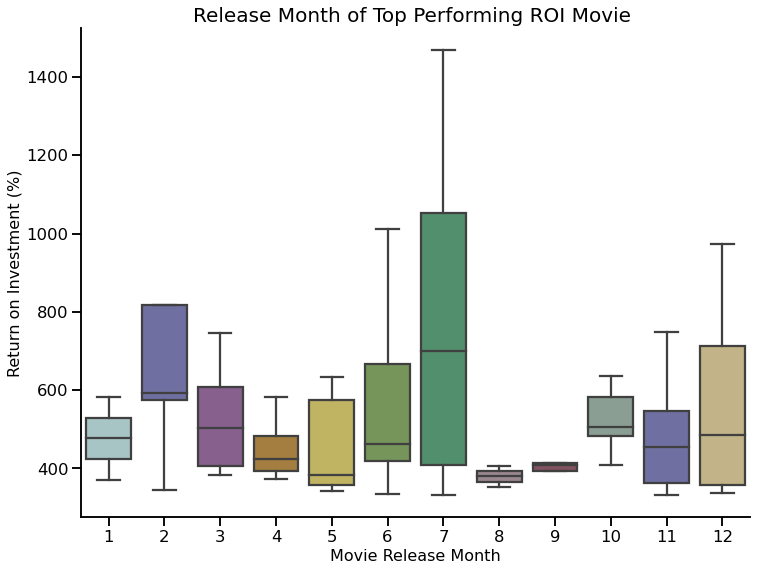

In [386]:
# Boxplot using release month vs ROI
# of Top 100 ROI Movies
x = ROIdf['month']
y = ROIdf['ROI']
# create plot 
f, ax = plt.subplots(figsize=(12,9))
sns.axes_style('white')
sns.set_context('talk') 
sns.boxplot(x, y,
            palette=mine,
            showfliers=False)
# Customize the axes and title
plt.title('Release Month of Top Performing ROI Movie ', fontsize=20)
plt.ylabel('Return on Investment (%)', fontsize=16)
plt.xlabel('Movie Release Month', fontsize=16) 
# Remove top and right borders
sns.despine()
plt.show();

While using the Top 100 ROI movies, you can see the largest return on investments were movies released during July! 

In [168]:
# define means for each
rpdm = (round(ROIdf.production_budget.mean(),0))
rdgm = (round(ROIdf.domestic_gross.mean(),0))
rwgm = (round(ROIdf.worldwide_gross.mean(),0))

# The average budget and gross for Top ROI movies
print('Average Information for Top 100 ROI Movies as follows: ',
      'Mean Production Budget is', rpdm, ',',
      'Average Domestic Gross is', rdgm, ',',
      'Mean Worldwide Gross is', rwgm, '.')

# Look at averages during highest month
# chose only data within July
m7df = ROIdf[ROIdf['month'] == 7]
rrm7 = (round(m7df.ROI.mean(),0))
rpdm7 = (round(m7df.production_budget.mean(),0))
rdgm7 = (round(m7df.domestic_gross.mean(),0))
rwgm7 = (round(m7df.worldwide_gross.mean(),0))

# # With the average ROI for July movies
# # with average budget and grosses
# print('Mean Information for Top ROI July Releases as follows: ',
#       'Average ROI for July Releases is', rrm7, 'percent ,',
#       'Mean Production Budget is', rpdm7, ',',
#       'Average Domestic Gross is', rdgm7, ',',
#       'Mean Worldwide Gross is', rwgm7, '.')

# Look at averages during lowest month
# chose only data within August
m8df = ROIdf[ROIdf['month'] == 8]
rrm8 = (round(m8df.ROI.mean(),0))
rpdm8 = (round(m8df.production_budget.mean(),0))
rdgm8 = (round(m8df.domestic_gross.mean(),0))
rwgm8 = (round(m8df.worldwide_gross.mean(),0))

# # With the average ROI for August movies
# # with average budget and grosses
# print('Average Information for Top ROI August Releases as follows: ',
#       'Mean ROI is', rrm7, ',',
#       'Average Production Budget is', rpdm7, ',',
#       'Mean Domestic Gross is', rdgm7, ',',
#       'Average Worldwide Gross is', rwgm7, '.')


Average Information for Top 100 ROI Movies as follows:  Mean Production Budget is 127864052.0 , Average Domestic Gross is 293824363.0 , Mean Worldwide Gross is 805107187.0 .


In [167]:
# Look at averages during lowest month
# largest - smallest ROI preforming months
mdr = rrm7 - rrm8
mdpd = rpdm7 - rpdm8
mddg = rdgm7 - rdgm8
mdwg = rwgm7 - rwgm8 
print('Differences in Averages between July (highest) and August (lowest) '
      'regarding Top 100 ROI Movies since 2010 are as follows: ',
      'Mean difference in ROI is', mdr, 'percent ,',
      'Average Production Budget change is', mdpd, ',',
      'Mean difference in Domestic Gross is', mddg, ',',
      'Average Worldwide Gross change is', mdwg , '.')

Differences in Averages between July (highest) and August (lowest) regarding Top 100 ROI Movies since 2010 is as follows:  Mean difference in ROI is 366.0 percent , Average Production Budget change is -45656101.0 , Mean difference in Domestic Gross is -22928531.0 , Average Worldwide Gross change is 97675541.0 .


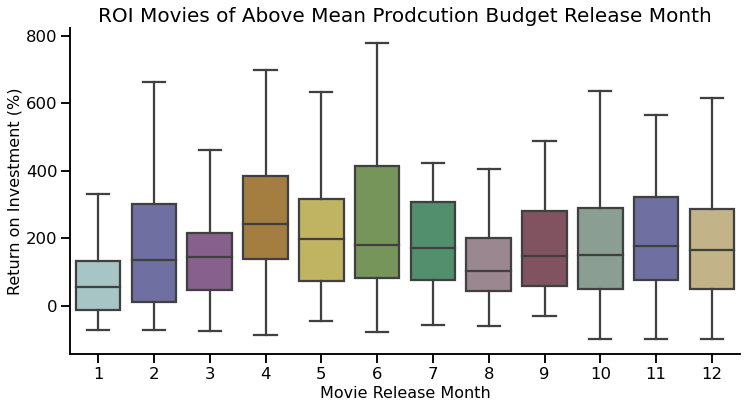

In [384]:
# Boxplot using release month vs ROI
# of movies above mean production budget
x = MMSPdf['month']
y = MMSPdf['ROI']
# create plot 
f, ax = plt.subplots(figsize=(12,6))
sns.axes_style('white')
sns.set_context('talk') 
sns.boxplot(x, y,
            palette=mine,
            showfliers=False)
# Customize the axes and title
plt.title('ROI Movies of Above Mean Prodcution Budget Release Month',
          fontsize=20)
plt.ylabel('Return on Investment (%)', fontsize=16)
plt.xlabel('Movie Release Month', fontsize=16) 
# Remove top and right borders
sns.despine()
plt.show();

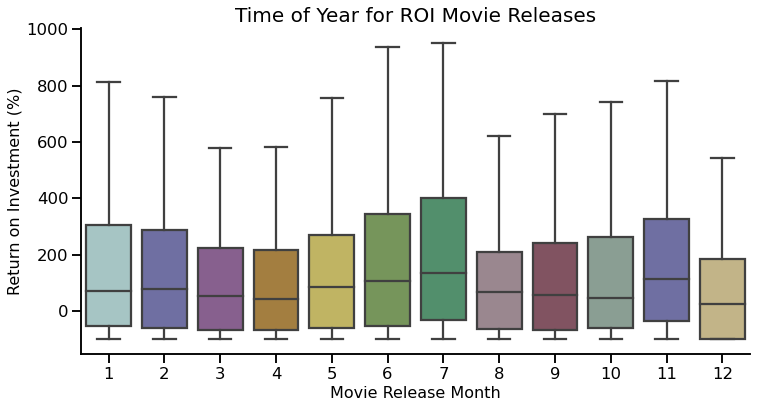

In [385]:
# Boxplot using release month vs ROI
# for all df
x = MMSEIdf['month']
y = MMSEIdf['ROI']

# create plot
f, ax = plt.subplots(figsize=(12,6))
sns.axes_style('white')
sns.set_context('talk')
sns.boxplot(x, y,
            palette=mine,
            showfliers=False)
# Customize the axes and title
plt.title('Time of Year for ROI Movie Releases',
          fontsize=20)
plt.ylabel('Return on Investment (%)', fontsize=16)
plt.xlabel('Movie Release Month', fontsize=16) 
# Remove top and right borders
sns.despine()
plt.show();

In [222]:
#creating for loop to fill genre columns with boolean values
for index, row in ROIdf.iterrows():
    if row['genres']:
        for genre in row['genres']:
            ROIdf.loc[index, genre] = 1

In [223]:
#pulling list of genres from the columns we created
cols = list(ROIdf.columns[12:])

#viewing to make sure list is correct
cols

['Biography',
 'Drama',
 'Music',
 'Animation',
 'Comedy',
 'Adventure',
 'Thriller',
 'Romance',
 'Action',
 'Documentary',
 'Sci-Fi',
 'Fantasy',
 'Family',
 'Sport',
 'Crime',
 'Musical',
 'Mystery',
 'Horror',
 'History',
 'Western']

In [224]:
# Create dictionary of genre sums as k:v pairings using for loop to 
# sum the bools for each genre
GSdict = {}
for col in cols:
    count = ROIdf[col].sum() 
    GSdict[col] = count
    
# View dictionary
GSdict

{'Biography': 6.0,
 'Drama': 29.0,
 'Music': 1.0,
 'Animation': 28.0,
 'Comedy': 41.0,
 'Adventure': 56.0,
 'Thriller': 17.0,
 'Romance': 6.0,
 'Action': 48.0,
 'Documentary': 4.0,
 'Sci-Fi': 27.0,
 'Fantasy': 10.0,
 'Family': 13.0,
 'Sport': 2.0,
 'Crime': 11.0,
 'Musical': 3.0,
 'Mystery': 7.0,
 'Horror': 3.0,
 'History': 1.0,
 'Western': 1.0}

In [225]:
# sorting dictionary values and choosing the # of movies at the 10th index
# creating dict with only the common genres with more than 9 films
# using dictionary comprehension (items) to select k:v pairs where value > 9
sorted_dict = sorted(GSdict.values(),
                     reverse=True)[9]

TGSdict = {k: v for k, 
           v in GSdict.items()
           if v >= sorted_dict}

#viewing the minimum value of our new dictionary
sorted_dict

10.0

In [226]:
#viewing edited dictionary
TGSdict

{'Drama': 29.0,
 'Animation': 28.0,
 'Comedy': 41.0,
 'Adventure': 56.0,
 'Thriller': 17.0,
 'Action': 48.0,
 'Sci-Fi': 27.0,
 'Fantasy': 10.0,
 'Family': 13.0,
 'Crime': 11.0}

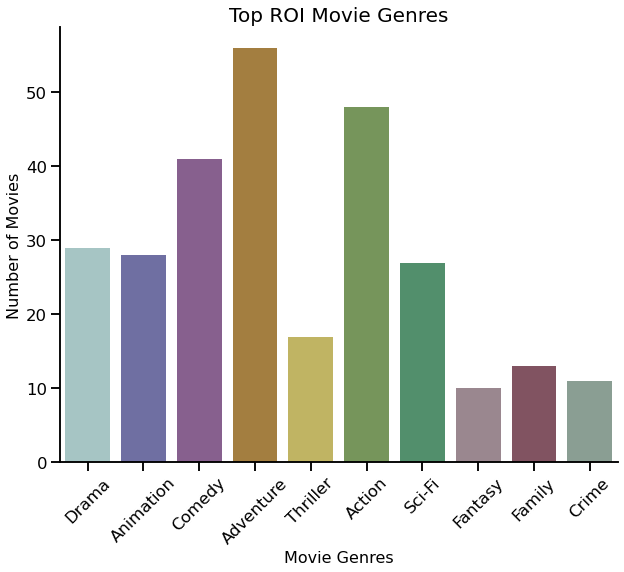

In [375]:
#creating x and y values to plot our dictionary
xgc = list(TGSdict.keys())
ygc = list(TGSdict.values())

#plotting a bar chart of genre and count dictionary
f, ax = plt.subplots(figsize=(10,8))
sns.axes_style('white')
sns.set_context('talk')
sns.barplot(xgc, ygc, 
            palette=mine)
# Customize the axes and title
plt.title('Top ROI Movie Genres', fontsize=20)
plt.ylabel('Number of Movies', fontsize=16)
plt.xlabel('Movie Genres', fontsize=16) 
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();

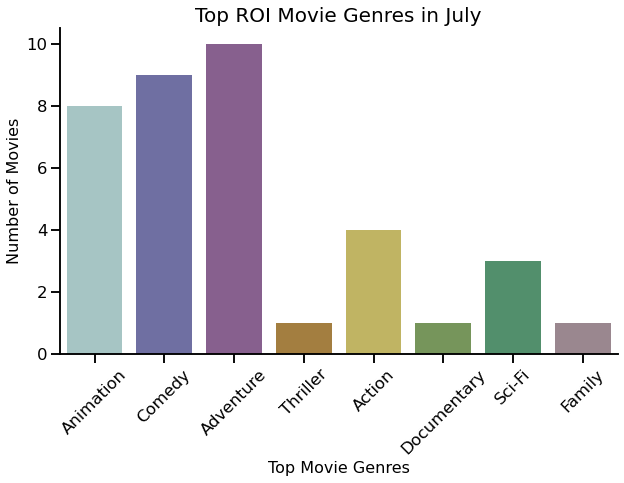

In [379]:
# pulling list of genres from the columns we created
ROI7df = ROIdf[ROIdf['month'] == 7]
cols7 = list(ROI7df.columns[12:])

# Create dictionary of genre sums as k:v pairings using for loop to 
# sum the bools for each genre
GS7dict = {}
for col in cols:
    count = ROI7df[col].sum() 
    GS7dict[col] = count

# creating dict
sorted7_dict = sorted(GS7dict.values(),
                     reverse=True)[7]

TGS7dict = {k: v for k,
           v in GS7dict.items()
           if v >= sorted7_dict}

# viewing edited dictionary
TGS7dict

# creating x and y values to plot our dictionary
xg7c = list(TGS7dict.keys())
yg7c = list(TGS7dict.values())

# plotting a bar chart of genre and count dictionary
f, ax = plt.subplots(figsize=(10,6))
sns.axes_style('white')
sns.set_context('talk')
sns.barplot(xg7c, yg7c,
            palette=mine)
# Customize the axes and title
plt.title('Top ROI Movie Genres in July', fontsize=20)
plt.ylabel('Number of Movies', fontsize=16)
plt.xlabel('Top Movie Genres', fontsize=16)
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();

In [233]:
# Lets take the movies and studios, combine it with ROIdf
# to extract the true top competetors 
Sdf = MGSdf.drop(['domestic_gross', 'year'], axis=1)
Sdf.head()

,movie,studio
1872,Star Wars: The Force Awakens,Disney
3080,Black Panther,Disney
1873,Jurassic World,Universal
727,Marvel's The Avengers,Disney
3079,Avengers: Infinity War,Disney


In [234]:
# Make a new dataframe, 'RSdf' = 'ROI Studios df'
# by merging the two, on the shared 'movie' column.
RSdf = ROIdf.merge(Sdf, how='left', on='movie')

# View the new!
RSdf.head()
spread(RSdf)

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,...,Fantasy,Family,Sport,Crime,Musical,Mystery,Horror,History,Western,studio
0,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,[tt1727824],134.0,"[Biography, Drama, Music]",8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disney
1,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,[tt2293640],91.0,"[Animation, Comedy, Adventure]",6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universal
2,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,[tt2322441],125.0,"[Thriller, Drama, Romance]",4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universal
3,Deadpool,6.548251e+07,4.099100e+08,9.043649e+08,2016,2,[tt1431045],108.0,"[Action, Comedy, Adventure]",8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disney
4,Despicable Me 3,8.290939e+07,2.925312e+08,1.143849e+09,2017,6,[tt3469046],89.0,"[Animation, Comedy, Adventure]",6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universal


***Shape:*** (100, 33) ***Null Sum Per Column:*** movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
year                  0
month                 0
tconst                0
runtime               0
genres                0
averagerating         0
numvotes              0
ROI                   0
Biography            94
Drama                71
Music                99
Animation            72
Comedy               59
Adventure            44
Thriller             83
Romance              94
Action               52
Documentary          96
Sci-Fi               73
Fantasy              90
Family               87
Sport                98
Crime                89
Musical              97
Mystery              93
Horror               97
History              99
Western              99
studio               12
dtype: int64 ***Null Percentage within Columns:*** movie                 0.0
production_budget     0.0
domestic_gross        0.0
worldwide_gross       0.0
yea

In [235]:
RSdf = RSdf.dropna(subset=['studio'])

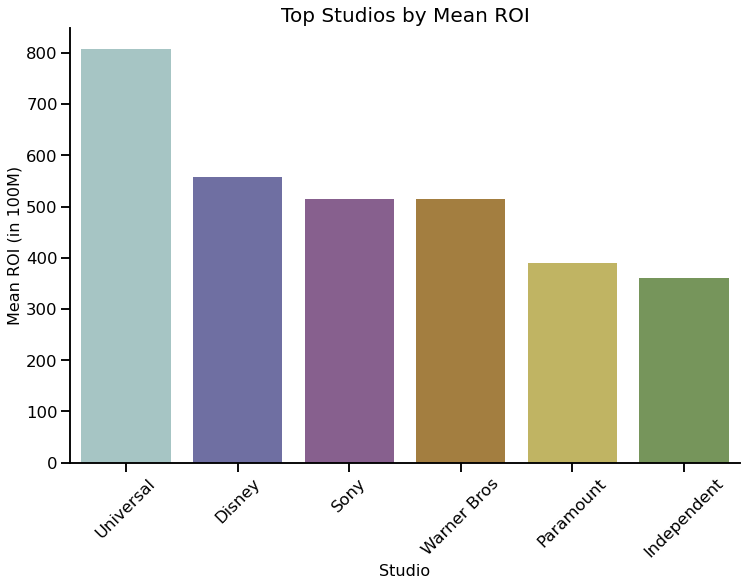

In [392]:
# group by to pull out each studio
RS_grp = RSdf.groupby(['studio'])
ROIp = RS_grp['ROI'].mean()
ROIp.sort_values(ascending=False, inplace=True)

# graph
ROIp = ROIp[:6,]
sns.axes_style('white')
sns.set_context('talk')
plt.figure(figsize=(12,8))
sns.barplot(ROIp.index,
            ROIp.values, 
            palette=mine)
# Customize the axes and title
plt.title('Top Studios by Mean ROI', fontsize=20)
plt.ylabel('Mean ROI (in 100M)', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();

The Formula for Gross Profit Margin
\begin{aligned} &\text{Gross Profit Margin}=\frac{\text{Net Sales }-\text{ COGS}}{\text{Net Sales}}\\ \end{aligned} 
​
  
Gross Profit Margin = 
Net Sales
Net Sales − COGS
​
 
​
A company's gross profit margin percentage is calculated by first subtracting the cost of goods sold (COGS) from the net sales (gross revenues minus returns, allowances, and discounts). This figure is then divided by net sales, to calculate the gross profit margin in percentage terms. 

(https://www.investopedia.com/terms/g/gross_profit_margin.asp)

Due to `ROIdf` containing the Top 100 performing movies, a new df needs to be made so that we can accurately assess `GPM`, and not just from the highest ROI movies.  

In [391]:
# Make a new dataframe, 'GSdf' = 'GPM Studios df'
# by merging the two, on the shared 'movie' column.
GSdf = MMSPdf.merge(Sdf, how='left', on='movie')

# View the new!
GSdf.head()
spread(GSdf)

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes,ROI,studio
0,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,[tt1727824],134.0,"[Biography, Drama, Music]",8.0,345466.0,1527.0,Disney
1,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,[tt2293640],91.0,"[Animation, Comedy, Adventure]",6.4,193917.0,1468.0,Universal
2,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,[tt2322441],125.0,"[Thriller, Drama, Romance]",4.1,279126.0,1327.0,Universal
3,Deadpool,6.548251e+07,4.099100e+08,9.043649e+08,2016,2,[tt1431045],108.0,"[Action, Comedy, Adventure]",8.0,820847.0,1281.0,Disney
4,Despicable Me 3,8.290939e+07,2.925312e+08,1.143849e+09,2017,6,[tt3469046],89.0,"[Animation, Comedy, Adventure]",6.3,92580.0,1280.0,Universal


***Shape:*** (525, 13) ***Null Sum Per Column:*** movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
year                   0
month                  0
tconst                 0
runtime                0
genres                 0
averagerating          0
numvotes               0
ROI                    0
studio               115
dtype: int64 ***Null Percentage within Columns:*** movie                 0.0
production_budget     0.0
domestic_gross        0.0
worldwide_gross       0.0
year                  0.0
month                 0.0
tconst                0.0
runtime               0.0
genres                0.0
averagerating         0.0
numvotes              0.0
ROI                   0.0
studio               21.9
dtype: float64


In [393]:
# Drop null values
GSdf = GSdf.dropna(subset=['studio'])

In [395]:
# GPM = Gross Profit Margin = 
# ((Total Profit-Total Costs)/Total Profit) * 100
GSdf['GPM'] = (round(((GSdf['worldwide_gross']
                - GSdf['production_budget'])
               /GSdf['worldwide_gross'])*100, 0)
              )

# Make new dataframe grouped by GPM in descending order
# indexed to only include the first 100 values
GPMdf = GSdf.sort_values(
    by=['GPM'], ascending=False)[:100]

# Ensure new element will be a pandas dataframe
GPMdf = pd.DataFrame(GPMdf)

# Lets see the top GPM movies
GPMdf.head()
spread(GPMdf)

,movie,production_budget,domestic_gross,worldwide_gross,year,month,tconst,runtime,genres,averagerating,numvotes,ROI,studio,GPM
0,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,[tt1727824],134.0,"[Biography, Drama, Music]",8.0,345466.0,1527.0,Disney,94.0
1,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,[tt2293640],91.0,"[Animation, Comedy, Adventure]",6.4,193917.0,1468.0,Universal,94.0
2,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,[tt2322441],125.0,"[Thriller, Drama, Romance]",4.1,279126.0,1327.0,Universal,93.0
3,Deadpool,6.548251e+07,4.099100e+08,9.043649e+08,2016,2,[tt1431045],108.0,"[Action, Comedy, Adventure]",8.0,820847.0,1281.0,Disney,93.0
4,Despicable Me 3,8.290939e+07,2.925312e+08,1.143849e+09,2017,6,[tt3469046],89.0,"[Animation, Comedy, Adventure]",6.3,92580.0,1280.0,Universal,93.0


***Shape:*** (100, 14) ***Null Sum Per Column:*** movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
month                0
tconst               0
runtime              0
genres               0
averagerating        0
numvotes             0
ROI                  0
studio               0
GPM                  0
dtype: int64 ***Null Percentage within Columns:*** movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
year                 0.0
month                0.0
tconst               0.0
runtime              0.0
genres               0.0
averagerating        0.0
numvotes             0.0
ROI                  0.0
studio               0.0
GPM                  0.0
dtype: float64


In [406]:
#creating for loop to fill genre columns with boolean values
for index, row in GPMdf.iterrows():
    if row['genres']:
        for genre in row['genres']:
            GPMdf.loc[index, genre] = 1
            
#pulling list of genres from the columns we created
columns = list(GPMdf.columns[14:])

# Create dictionary of genre sums as k:v pairings using for loop to 
# sum the bools for each genre
GSGdict = {}
for col in columns:
    count = GPMdf[col].sum() 
    GSGdict[col] = count
    
# View dictionary
GSGdict

{'Biography': 6.0,
 'Drama': 27.0,
 'Music': 2.0,
 'Animation': 28.0,
 'Comedy': 43.0,
 'Adventure': 58.0,
 'Thriller': 17.0,
 'Romance': 5.0,
 'Action': 50.0,
 'Documentary': 4.0,
 'Sci-Fi': 23.0,
 'Fantasy': 9.0,
 'Family': 7.0,
 'Sport': 3.0,
 'Crime': 12.0,
 'Mystery': 6.0,
 'Horror': 3.0,
 'History': 1.0,
 'Western': 1.0,
 'Musical': 1.0}

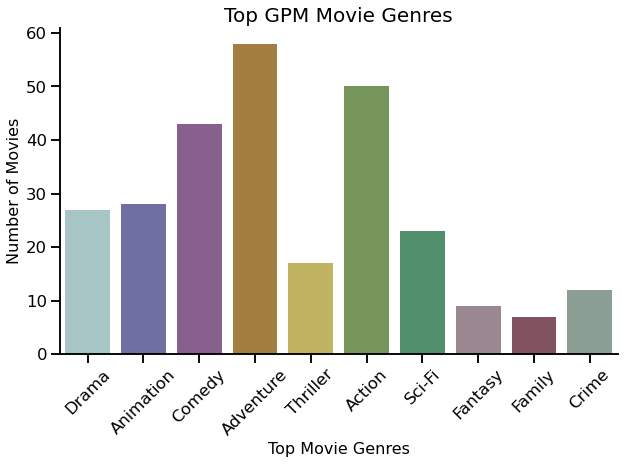

In [408]:
# creating dict
sortedG_dict = sorted(GSGdict.values(),
                      reverse=True)[9]

TGSGdict = {k: v for k,
           v in GSGdict.items()
           if v >= sortedG_dict}

#viewing edited dictionary
TGSGdict

#creating x and y values to plot our dictionary
xgGc = list(TGSGdict.keys())
ygGc = list(TGSGdict.values())

# create plot 
f, ax = plt.subplots(figsize=(10,6))
sns.axes_style('white')
sns.set_context('talk')
sns.barplot(xgGc, ygGc,
            palette=mine)
# Customize the axes and title
plt.title('Top GPM Movie Genres', fontsize=20)
plt.ylabel('Number of Movies', fontsize=16)
plt.xlabel('Top Movie Genres', fontsize=16) 
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();

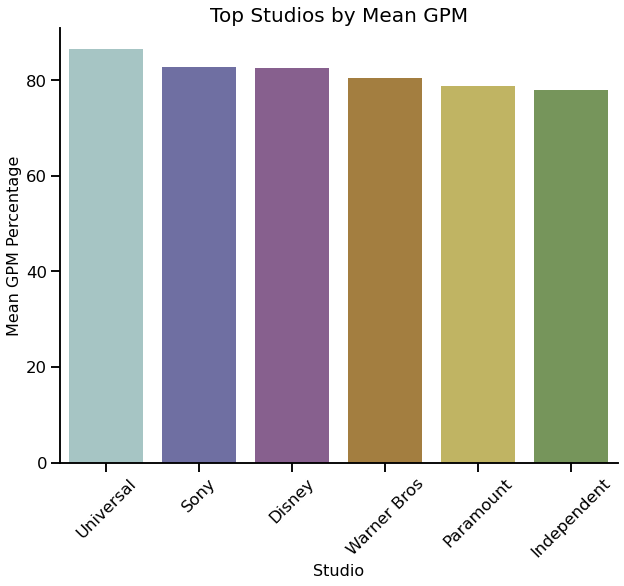

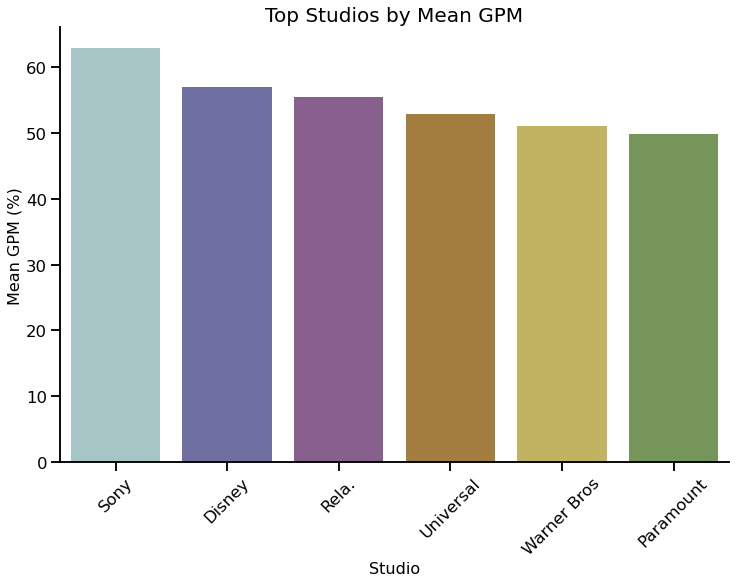

In [410]:
# group by to pull out each studio
GPM_grp = GPMdf.groupby(['studio'])
GPMp = GPM_grp['GPM'].mean()
GPMp.sort_values(ascending=False, inplace=True)

# create graph
GPMp = GPMp[:6,]
plt.figure(figsize=(10,8))
sns.axes_style('white')
sns.set_context('talk')
sns.barplot(GPMp.index, GPMp.values,
            palette=mine)
# Customize the axes and title
plt.title('Top Studios by Mean GPM', fontsize=20)
plt.ylabel('Mean GPM Percentage', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();


# group by to pull out each studio
GS_grp = GSdf.groupby(['studio'])
GPMp = GS_grp['GPM'].mean()
GPMp.sort_values(ascending=False, inplace=True)

# graph
GPMp = GPMp[:6,]
sns.axes_style('white')
sns.set_context('talk')
plt.figure(figsize=(12,8))
sns.barplot(GPMp.index,
            GPMp.values, 
            palette=mine)
# Customize the axes and title
plt.title('Top Studios by Mean GPM', fontsize=20)
plt.ylabel('Mean GPM (%)', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.xticks(rotation=45)
# Remove top and right borders
sns.despine()
plt.show();

In [271]:
correlation = GPMp.corr(GPMdf['studio'].value_counts()).round(2)
correlation

0.56

Lets investigate Best Rated Genres for Top ROI Movies

In [ ]:
# merge tables
ratings_by_genre = pd.merge(ratings_df, genres_df, on='movie', how='inner')

# create
ggrp = TBdf.groupby(TBdf.genres)
mggrp = ggrp['averagerating'].mean()
mggrp.sort_values(ascending=False, inplace=True)

# create plot
mggrp = mggrp[:12,]
plt.figure(figsize=(12,8))
sns.barplot(mggrp.index, mggrp.values,
           palette=mine)
plt.title('Top 12 Best Rated Genres', fontsize=20)
plt.ylabel('Mean Rating', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()


# IV. Modeling
Here you’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:

***Select Modeling Techniques***: Determine which algorithms to try (e.g. regression, neural net).
<br><br>
***Generate Test Design***: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
<br><br>
***Build Model***: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
<br><br>
***Assess Model***: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.
<br><br>
Although the CRISP-DM Guide suggests to “iterate model building and assessment until you strongly believe that you have found the best model(s)”,  in practice teams should continue iterating until they find a “good enough” model, proceed through the CRISP-DM lifecycle, then further improve the model in future iterations. 
<br><br>

# V. Evaluation
Whereas the Assess Model task of the Modeling phase focuses on technical model assessment, the Evaluation phase looks more broadly at which model best meets the business and what to do next. This phase has three tasks:

***Evaluate Results***: Do the models meet the business success criteria? Which one(s) should we approve for the business?
<br><br>
***Review Process***: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
<br><br>
***Next Steps***: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.
<br><br>

In [ ]:
# Make new dataframe grouped by 
# top domestic grossing in descending order
# indexed to only include the first 100 values
TDGdf = MMSEIdf.sort_values(
    by=['domestic_gross'], ascending=False)[:100]
# Ensure new element will be a pandas dataframe
TDGdf = pd.DataFrame(TDGdf)

TDGdf

In [ ]:
# Make new dataframe grouped by
# top grossing worldwide in descending order
# indexed to only include the first 100 values
TWGdf = MMSEIdf.sort_values(
    by=['worldwide_gross'], ascending=False)[:100]
# Ensure new element will be a pandas dataframe
TWGdf = pd.DataFrame(TWGdf)

TWGdf